# Statistical Data Analysis #

This notebook aims to complete the following application of statistics:
* Compute the mean star rating for two categories of restaurants, and test whether the difference in mean
star rating is statistically significant.

In [85]:
# Imports
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import statsmodels.stats.api as sms

from collections import Counter
from itertools import chain

In [3]:
# Load data
r_df = pd.read_csv('/Users/dwalkerpage/Documents/Data_Science/Springboard/Projects/springboard/Capstone_Projects/Capstone_Project_2/Code/cleaned_restaurants_final.csv')

In [33]:
r_df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars_x', 'state', 'cool', 'date', 'funny',
       'review_id', 'stars_y', 'text', 'useful', 'user_id'],
      dtype='object')

In [25]:
r_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id
0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0.0,2017-01-27 21:54:30,2.0,6W0MQHmasK0IsaoDo4bmkw,3.0,My girlfriend and I went for dinner at Emerald...,3.0,2K62MJ4CJ19L8Tp5pRfjfQ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0.0,2013-06-24 23:11:30,0.0,BeeBfUxvzD4qNX4HxrgA5g,3.0,We've always been there on a Sunday so we were...,0.0,A0kENtCCoVT3m7T35zb2Vg
2,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0.0,2016-01-04 12:59:22,0.0,A1D2kUnZ0HTroFreAheNSg,3.0,"***No automatic doors, not baby friendly!*** I...",0.0,SuOLY03LW5ZcnynKhbTydA
3,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,0.0,2014-05-09 02:38:43,0.0,2pf45Stf-pNew-xgTababQ,1.0,"Horrible service,\nI went there tonight with m...",1.0,lymyUak6KNcNKoDbK87MiQ
4,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,...,2.5,ON,2.0,2011-03-21 14:39:55,1.0,RHhlmL07evgAdPaXQV8Omg,4.0,One of the gauges of a good Chinese restaurant...,2.0,6vU0I5XgCv9OQHZ76rV6qw


In [12]:
# Convert strings in 'categories' column to lists of categories
categories = r_df['categories'].str.split(pat = ', ')

In [22]:
# Compute the frequency of each individual category in the dataset
# From here: https://stackoverflow.com/questions/51813266/get-unique-values-from-pandas-series-of-lists
categories_counts = pd.DataFrame.from_dict(Counter(chain(*categories)), orient='index').sort_values(0, ascending=False)

In [59]:
categories_counts.head(25)

,0
Restaurants,4167461
Food,1124819
Nightlife,1003084
Bars,968677
American (Traditional),729756
American (New),726153
Breakfast & Brunch,640900
Sandwiches,472401
Mexican,399047
Burgers,392176


In [69]:
# Dataframe with only restaurants in a 'Sushi Bars' category
sushi_r_df = r_df[r_df['categories'].str.contains('Sushi Bars')]

In [67]:
# Dataframe with only restaurants in a 'Mexican' category
mexican_r_df = r_df[r_df['categories'].str.contains('Mexican')]

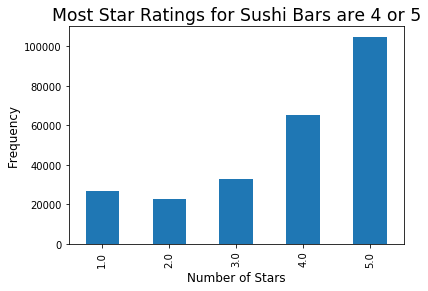

In [89]:
# Plot total number/frequency of each star rating
_ = sushi_r_df.stars_y.value_counts().sort_index().plot.bar()
_ = plt.xlabel('Number of Stars', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings for Sushi Bars are 4 or 5', fontsize='xx-large')

plt.show()

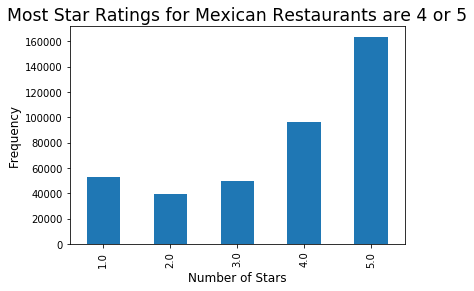

In [90]:
# Plot total number/frequency of each star rating
_ = mexican_r_df.stars_y.value_counts().sort_index().plot.bar()
_ = plt.xlabel('Number of Stars', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings for Mexican Restaurants are 4 or 5', fontsize='xx-large')

plt.show()

Let's work with samples of size 100_000 to ensure that we are analyzing datasets of the same size.

In [91]:
sushi_r_df_sample = sushi_r_df.sample(n=100_000, random_state=7)

In [92]:
mexican_r_df_sample = mexican_r_df.sample(n=100_000, random_state=7)

In [96]:
# Compute mean stars for Sushi Bars
sushi_r_df_sample.stars_y.mean()

3.78071

In [97]:
# Compute mean stars for Mexican
mexican_r_df_sample.stars_y.mean()

3.69819

In [98]:
# Data table includes the total number of non-missing observations, standard deviation, standard error,
# and the 95% confidence interval.
rp.summary_cont(sushi_r_df_sample.stars_y)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,stars_y,100000.0,3.78071,1.351185,0.004273,3.772335,3.789085


In [99]:
# Data table includes the total number of non-missing observations, standard deviation, standard error,
# and the 95% confidence interval.
rp.summary_cont(mexican_r_df_sample.stars_y)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,stars_y,100000.0,3.69819,1.416341,0.004479,3.689411,3.706969


**Null Hypothesis:** The mean star rating is the same for Sushi Bars and Mexican Restaurants.  
**Alternative Hypothesis:** The mean star rating is *not* the same for Sushi Bars and Mexican Restaurants

**alpha:** We will set alpha at 0.05, and thus conclude that a p-value less than or equal to 0.05 is statistically significant.

In [100]:
# Set significance level
alpha = 0.05

In [105]:
# Define function to perform t-tests
def t_test(data1, data2, equal_var=True):
    '''Computes T-statistic, p-value, and 95% Confidence Interval'''
    # Compute T-statistic and p-value
    result = stats.ttest_ind(data1, data2, equal_var=equal_var)
    # Compute 95% confidence interval
    # See here: https://stackoverflow.com/questions/31768464/confidence-interval-for-t-test-difference-between-means-in-python
    confidence_interval = sms.CompareMeans(sms.DescrStatsW(data1), sms.DescrStatsW(data2)).tconfint_diff()
    if result[1] <= alpha:
        print('T-statistic: ', result[0])
        print('p-value: ', result[1])
        print('95% Confidence Interval: ', confidence_interval)
        print('The difference is statistically significant.')
    else:
        print('T-statistic: ', result[0])
        print('p-value: ', result[1])
        print('95% Confidence Interval: ', confidence_interval)
        print('The difference is not statistically significant.')

In [104]:
# We set equal_var to False and hence perform Welch's t-test since the variances of the samples are unequal.
t_test(sushi_r_df_sample.stars_y, mexican_r_df_sample.stars_y, equal_var=False)

T-statistic:  13.330986336154858
p-value:  1.5909949135656546e-40
95% Confidence Interval:  (0.07038757388083748, 0.09465242611916282)
The difference is statistically significant.


The p-value is below our alpha, so we can reasonably reject the null hypothesis and conclude that the difference in mean star rating observed between Sushi Bars and Mexican Restaurants is
statistically significant.